In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import re

In [2]:
pattern = re.compile(r'(\d+):(\d+)\.(\d+)')
def to_time(s):
    m = pattern.search(s)
    if int(m.group(3)) > 10:
        return int(m.group(1))*60 + int(m.group(2)) + int(m.group(3))*0.001
    else:
        return int(m.group(1))*60 + int(m.group(2)) + int(m.group(3))*0.1

In [3]:
def DealWithTime(data):
    data['time'] = data['timestamp'].apply(to_time)
    return data.drop('timestamp',axis=1)

In [4]:
def GetData(filename):
    data = pd.read_csv(filename)
    data = data[['loggingTime(txt)','motionUserAccelerationX(G)', 'motionUserAccelerationY(G)', 'motionUserAccelerationZ(G)', 'gyroRotationX(rad/s)', 'gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)']]
    colums_name = ['timestamp','accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ']
    data.columns = colums_name
    return data

In [5]:
def Overview(data):
    plt.figure(figsize=(15,20))
    p1 = plt.subplot(3,1,1)
    p2 = plt.subplot(3,1,2)
    p3 = plt.subplot(3,1,3)
    p1.plot(left['accX'])
    p2.plot(left['accY'])
    p3.plot(left['accZ'])
    plt.show()

    plt.figure(figsize=(15,20))
    p4 = plt.subplot(3,1,1)
    p5 = plt.subplot(3,1,2)
    p6 = plt.subplot(3,1,3)
    p4.plot(left['gyroX'])
    p5.plot(left['gyroY'])
    p6.plot(left['gyroZ'])
    plt.show()

In [6]:
def butter_bandpass(lowcut, highcut, fs, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def butter_lowpass(highcut, fs, order=3):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='lowpass')
    return b, a

def butter_lowpass_filter(data, highcut, fs, order=3):
    b, a = butter_lowpass(highcut, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def getStepFrequency(data):
    ffted = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(ffted))
    idx = np.argmax(np.abs(ffted))
    freq = freqs[idx]
    return abs(freq*fs)

fs = 30

In [7]:
left = GetData("../dataset/zmq_left_2017-11-27_14-31-39_-0800.csv")
right =  GetData("../dataset/zmq_right_2017-11-27_14-31-48_-0800.csv")

In [8]:
# strange behaviour
print(left['timestamp'][:5])
print(right['timestamp'][:5])

0    31:39.8
1    31:39.8
2    31:39.8
3    31:39.9
4    31:39.9
Name: timestamp, dtype: object
0    2017-11-27 14:31:48.209 -0800
1    2017-11-27 14:31:48.274 -0800
2    2017-11-27 14:31:48.307 -0800
3    2017-11-27 14:31:48.309 -0800
4    2017-11-27 14:31:48.310 -0800
Name: timestamp, dtype: object


In [9]:
left = DealWithTime(left)
print(left[:5])

       accX      accY      accZ     gyroX     gyroY     gyroZ    time
0 -0.017033 -0.083313  0.036787 -0.357814  0.151834 -0.127528  1899.8
1 -0.017033 -0.083313  0.036787  0.268196  0.233556 -0.087942  1899.8
2 -0.016626 -0.053542 -0.043436  0.483860  0.236315 -0.131855  1899.8
3 -0.064966 -0.054201  0.040086  0.565937  0.278323 -0.265330  1899.9
4 -0.065369 -0.044680  0.030631  0.268849  0.274332 -0.358235  1899.9


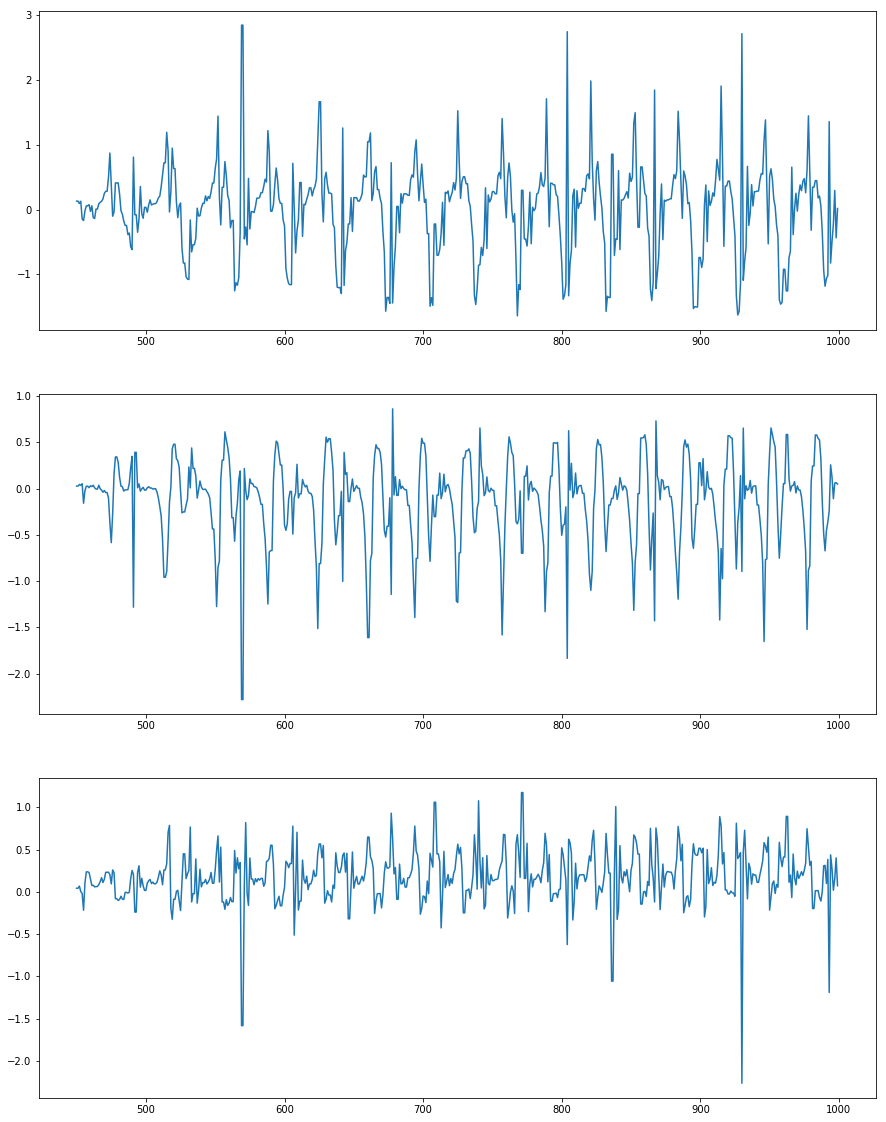

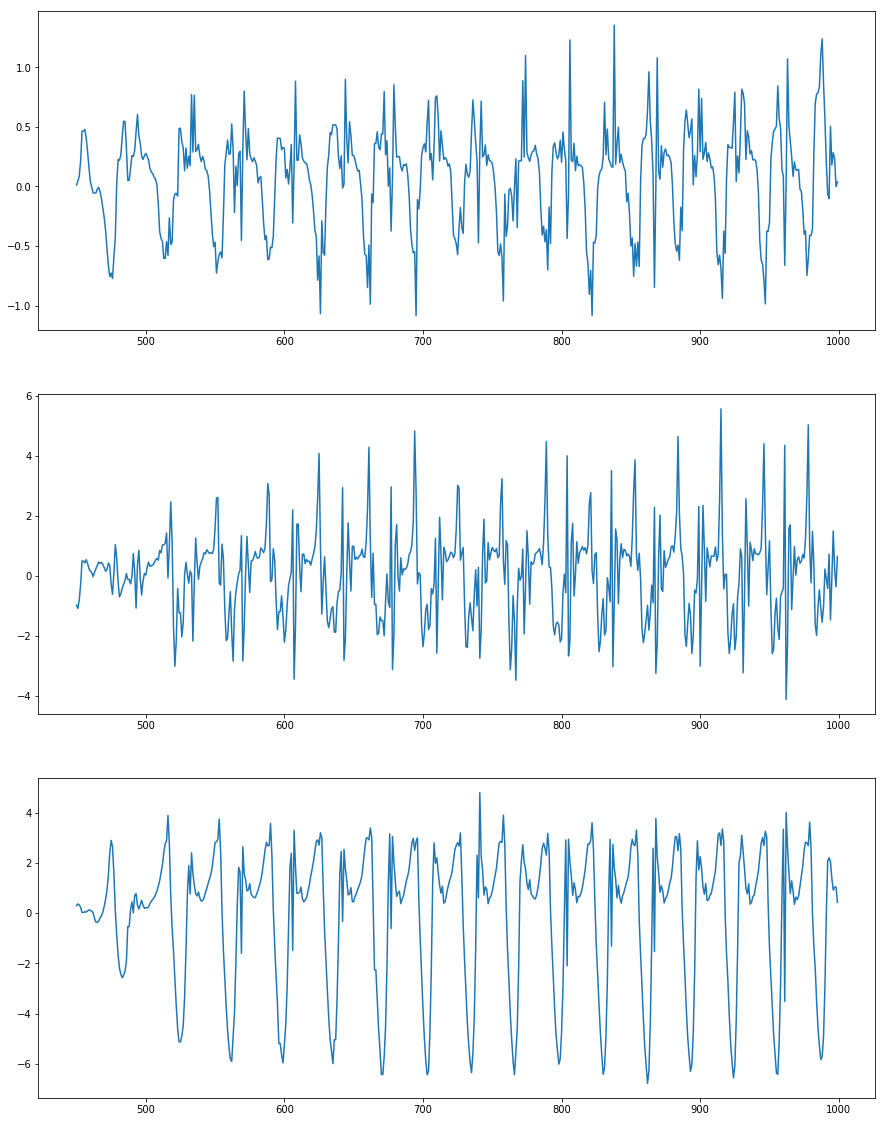

In [10]:
left = left[450:1000]
# Overview(left)

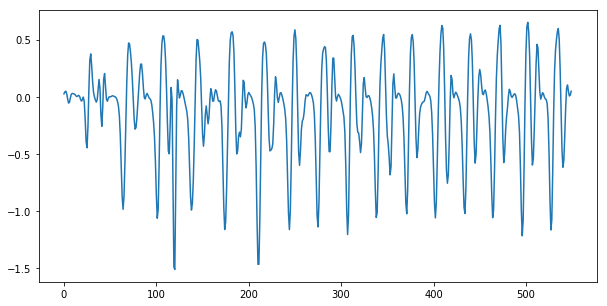

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


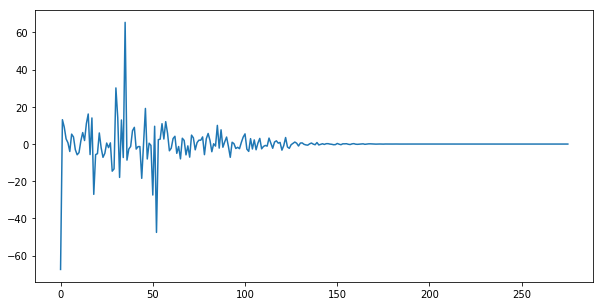

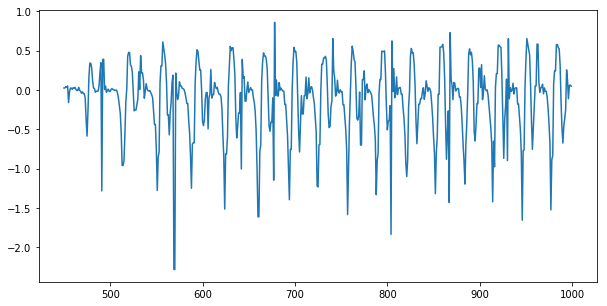

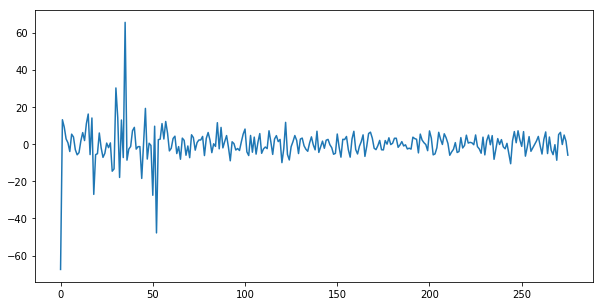

In [11]:
# highcut = 6
# filtered = butter_lowpass_filter(left['accY'],highcut, fs)
# plt.figure(figsize=(10,5))
# plt.plot(filtered)
# plt.show()
# plt.figure(figsize=(10,5))
# plt.plot(np.fft.rfft(filtered))
# plt.show()
# plt.figure(figsize=(10,5))
# plt.plot(left['accY'])
# plt.show()
# plt.figure(figsize=(10,5))
# plt.plot(np.fft.rfft(left['accY']))
# plt.show()

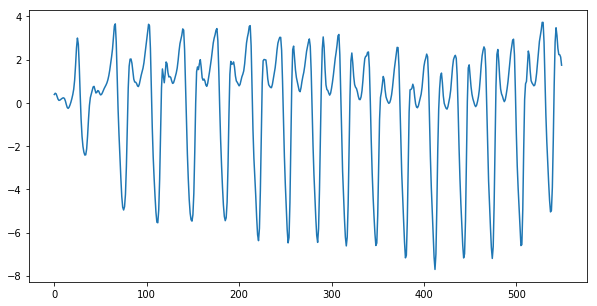

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


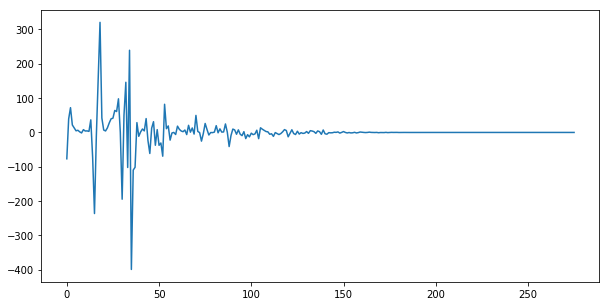

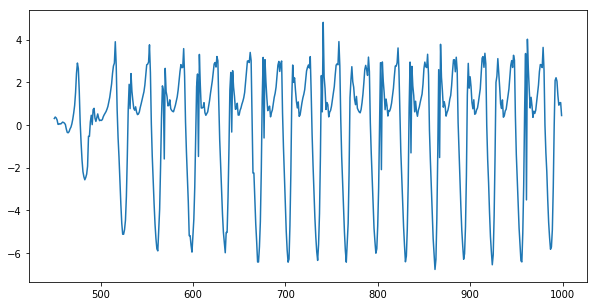

In [12]:
# lowcut = 0.05
# highcut = 6.5
# filtered = butter_bandpass_filter(left['gyroZ'],lowcut, highcut, fs)
# plt.figure(figsize=(10,5))
# plt.plot(filtered)
# plt.show()
# plt.figure(figsize=(10,5))
# plt.plot(np.fft.rfft(filtered))
# plt.show()
# plt.figure(figsize=(10,5))
# plt.plot(left['gyroZ'])
# plt.show()

In [13]:
highcut = 6
left['accX'] = butter_lowpass_filter(left['accX'],highcut, fs)
left['accY'] = butter_lowpass_filter(left['accY'],highcut, fs)
left['accZ'] = butter_lowpass_filter(left['accZ'],highcut, fs)

In [14]:
lowcut = 0.05
highcut = 6.5
left['gyroX'] = butter_bandpass_filter(left['gyroX'],lowcut, highcut, fs)
left['gyroY'] = butter_bandpass_filter(left['gyroY'],lowcut, highcut, fs)
left['gyroZ'] = butter_bandpass_filter(left['gyroZ'],lowcut, highcut, fs)

In [15]:
# frequency might be 0.927272727273
print(getStepFrequency(left['accY']))
print(getStepFrequency(left['accX']))
print(getStepFrequency(left['accZ']))
print(getStepFrequency(left['gyroY']))
print(getStepFrequency(left['gyroZ']))
print(getStepFrequency(left['gyroZ']))

1.90909090909
0.927272727273
0.0
0.927272727273
0.927272727273
0.927272727273
